<h1>Wine Quality</h1>

I'm going to use this notebook to explore a labeled wine quality dataset that I found via the Data Machina link email blast. I wonder if I can grok some insight as to choosing wines in the future? Is the dataset big enough, or comprehensive enough? Perhaps I will have to do some trial and error, adding a column with my own rating. Then, I can use the input values to (theoretically) choose wines I might like. Data-driven wine selection! 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
print("Pandas:",pd.__version__)
print("Numpy:",np.__version__)

Pandas: 0.18.1
Numpy: 1.11.1


In [2]:
red_wine = pd.read_csv("./data/winequality-red.csv", sep=';') #Note the need to tell pandas about semicolon delimiter

In [3]:
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
red_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
matplotlib.style.use('ggplot')
pd.options.display.max_columns = 100
pd.options.display.max_rows = 100

In [7]:
%matplotlib inline

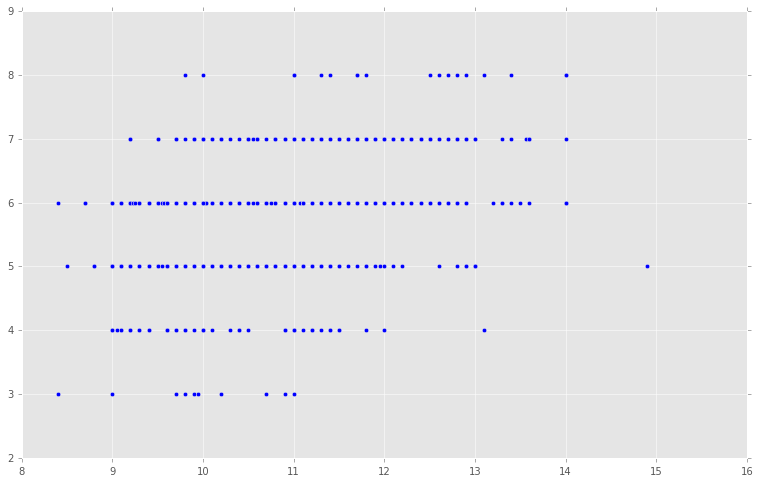

In [11]:
plt.figure(figsize=(13,8))
plt.scatter(red_wine.alcohol, red_wine.quality)

In [9]:
red_wine.index

RangeIndex(start=0, stop=1599, step=1)

<h4>
I think what I need to do next is to review feature selection from Titanic, sklearn, and logistic regression. I think this will end up as a classification problem, with quality as the label / target. 
To-do: 
    <ul>
    <li>Review feature selection</li>
    <li>split dataset into train / test</li>
    <li>determine most relevant features</li>
    <li>Create basic logistic regression model</li>
    <li>repeat as necessary</li>
    <li>Also - definitely play with visualization, matplotlib and maybe bokeh, datashader</li>
    </ul>
</h4>

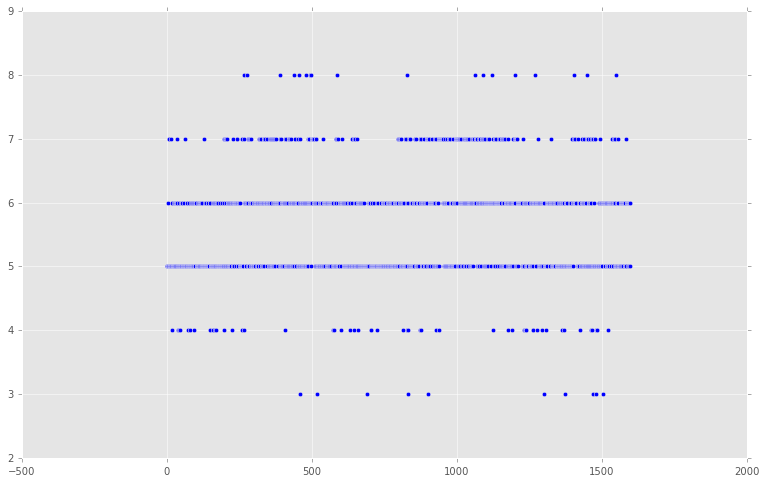

In [14]:
plt.figure(figsize=(13,8))
plt.scatter(red_wine.index, red_wine.quality)

In [17]:
red_wine.quality.min()

3

In [18]:
#Now to split the dataset into train and test data. sklearn has a nice function for that
from sklearn.model_selection import train_test_split
train, test = train_test_split(red_wine, test_size=0.27)

In [19]:
train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1301,6.7,0.86,0.07,2.0,0.100,20.0,57.0,0.99598,3.60,0.74,11.7,6
946,10.2,0.44,0.58,4.1,0.092,11.0,24.0,0.99745,3.29,0.99,12.0,7
184,6.7,0.62,0.21,1.9,0.079,8.0,62.0,0.99700,3.52,0.58,9.3,6
1529,7.1,0.69,0.08,2.1,0.063,42.0,52.0,0.99608,3.42,0.60,10.2,6
1152,8.3,0.60,0.25,2.2,0.118,9.0,38.0,0.99616,3.15,0.53,9.8,5


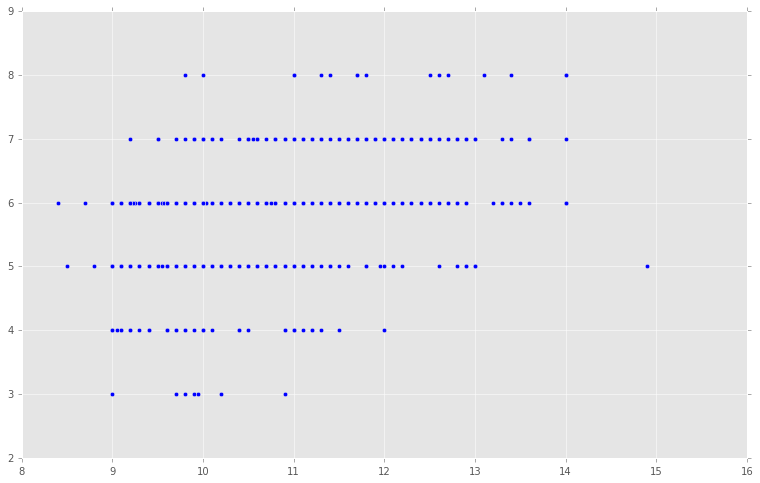

In [22]:
plt.figure(figsize=(13,8))
plt.scatter(train.alcohol, train.quality)

Now I really need to go back to my pandas class to look at how we reindexed dataframes as well as some plotting techniques. Maybe the new class can help? 

In [23]:
train.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [27]:
cols = train.columns
predictors = cols.drop('quality')

In [30]:
#Actually, let's try to use sklearn to pick the best features. From Titanic project:
from sklearn.feature_selection import SelectKBest, f_classif
selector = SelectKBest(f_classif,k=5)
selector.fit(train[predictors], train['quality'])

SelectKBest(k=5, score_func=<function f_classif at 0x11ca01d08>)

In [31]:
scores = -np.log10(selector.pvalues_)

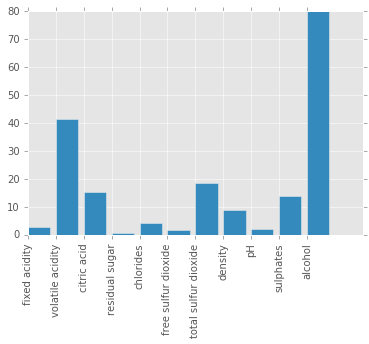

In [32]:
plt.bar(range(len(predictors)),scores)
plt.xticks(range(len(predictors)), predictors, rotation='vertical')
plt.show()

How funny - using SelectKBest, alcohol blows everything else out of the water. Yet, knowing the limitations of fermentation, it can't be everything. volatile acidity is an interesting feature, so I'll definitely include that, as well as total sulhpur dioxide, citric acid, and sulphates. I might be able to just keep going, following my Titanic walkthrough.

In [37]:
predictors = ['alcohol', 'volatile acidity', 'total sulfur dioxide', 'citric acid']
#Using the aforementioned features

<h1>Using a Random Forest Classifier</h1>

In [34]:
from sklearn import cross_validation
from sklearn.ensemble import RandomForestClassifier

/Users/charlierock/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [35]:
#Training the model with cross-validation from the training set. 
# Initialize the algorithm with default parameters
# n_estimators is the number of trees we want to make
# min_samples_split is the minimum number of rows we need to make a split
# min_samples_leaf is the minimum umber of samples we can have at the place (cont.)
# where a tree branch ends (the bottom points of the tree)
alg = RandomForestClassifier(random_state=1, n_estimators=10, min_samples_split=2, min_samples_leaf=1)

In [38]:
# compute the accuracy score for all the cross validation folds. 
kf = cross_validation.KFold(train.shape[0], n_folds=3, random_state=1)
scores = cross_validation.cross_val_score(alg, train[predictors], train['quality'], cv=kf)

In [39]:
print(scores.mean()) #average the scores from the 3 folds

0.610968294773


Woof! 61% accuracy. Not great, but this data could be hard to classify. Let's see how to add to this with ensemble learning, or gradient boosting. First, we'll tweak the random forest parameters to see how we can improve.

In [41]:
alg = RandomForestClassifier(random_state=1, n_estimators=50, min_samples_split=4, min_samples_leaf=2)
kf = cross_validation.KFold(train.shape[0], n_folds=3, random_state=1)
scores = cross_validation.cross_val_score(alg, train[predictors], train['quality'], cv=kf)
print(scores.mean())
print(scores)

0.627249357326
[ 0.62982005  0.64781491  0.60411311]


Jumped up to a whopping 62.7 percent accuracy. Not great at all. I'm sure this model could be tweaked further, but let's move on for now. 

<h2>Gradient Boosting Classifier, ensembled with Logistic Regression (a common combo)</h2>

In [42]:
#Import relevant modules
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

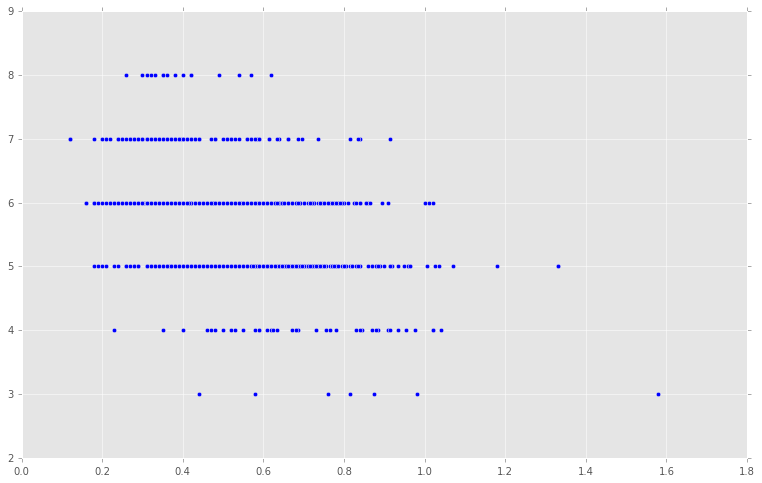

In [46]:
plt.figure(figsize=(13,8))
plt.scatter(train['volatile acidity'], train.quality)

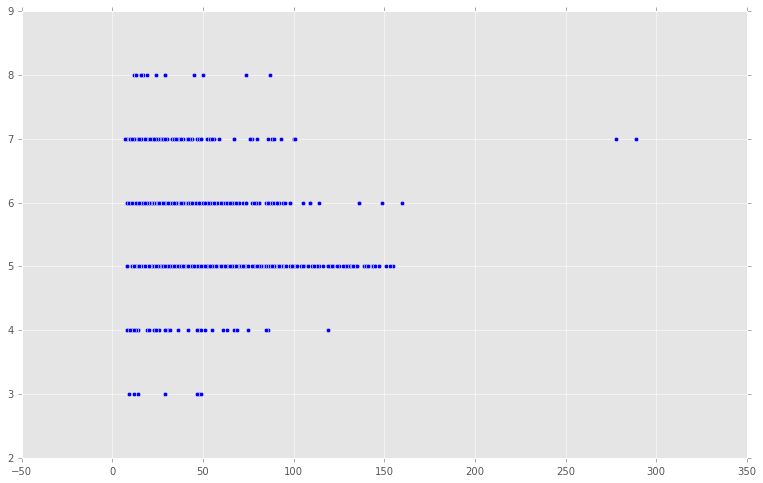

In [47]:
plt.figure(figsize=(13,8))
plt.scatter(train['total sulfur dioxide'], train.quality)

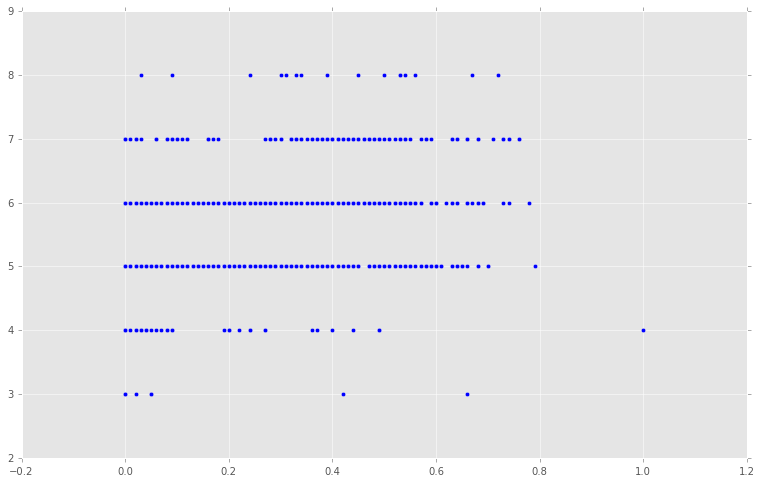

In [48]:
plt.figure(figsize=(13,8))
plt.scatter(train['citric acid'], train.quality)

From the above charts, it appears that alcohol, and volatile acidity are the more linearly related features, so I will use those for the logistic regression. All of the features will go into the gradient boosting classifier

In [50]:
algorithms = [[GradientBoostingClassifier(random_state=1, n_estimators=25, max_depth=3), ['volatile acidity', 'total sulfur dioxide', 'citric acid', 'alcohol']], [LogisticRegression(random_state=1), ['alcohol', 'volatile acidity']]]

In [70]:
kf = cross_validation.KFold(train.shape[0], n_folds=3, random_state=1)

In [72]:
predictions = []
for trains, tests in kf:
    train_target = train['quality'].iloc[trains]
    full_test_predictions = []
    for alg, predictors in algorithms:
        alg.fit(train[predictors].iloc[trains,:], train_target)
        test_predictions = alg.predict_proba(train[predictors].iloc[tests,:].astype(float))[:,1]
        full_test_predictions.append(test_predictions)
    test_predictions = (full_test_predictions[0] + full_test_predictions[1]) / 2
    predictions.append(test_predictions)

In [73]:
predictions = np.concatenate(predictions, axis=0)

In [66]:
import math
acc_num = math.sqrt(sum((predictions - train['quality'])**2))
accuracy = acc_num / len(predictions)
print(accuracy)

0.16635807162425265


My accuracy sucks

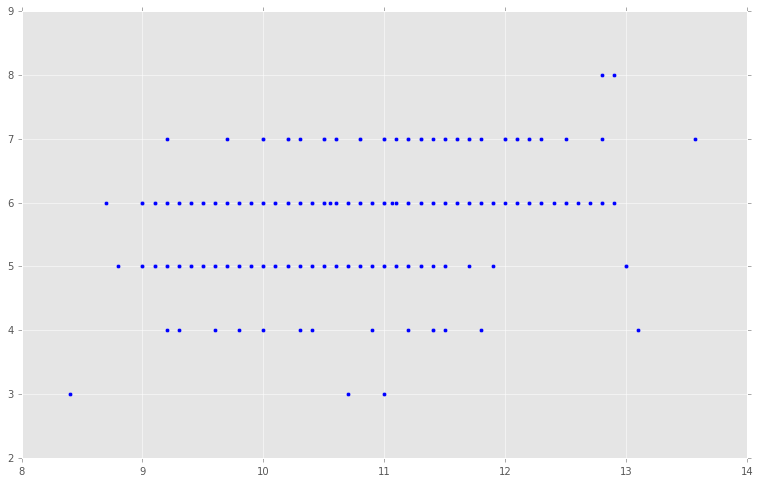

In [62]:
plt.figure(figsize=(13,8))
plt.scatter(test.alcohol, test.quality)